In [1]:
#!pip install jupyter_dashboards
#!jupyter dashboards quick-setup --sys-prefix
#!jupyter nbextension enable jupyter_dashboards --py --sys-prefix

In [2]:
from ipywidgets import interact, widgets

from descartes import PolygonPatch
from matplotlib.collections import PatchCollection

import localization as lx

%matplotlib inline
#Configure the notebooks to display plots inline and import some plotting tools
import matplotlib.pyplot as plt

#Seaborn provides nicer charts
import seaborn as sns
#We could define an OU theme
sns.set_style("whitegrid")

points= widgets.Textarea()

circle1=((3,2), 2)
circle2=((2,0), 1.5)
circle3=((1,2), 1.5)
c1,c2,c3=circle1,circle2,circle3

/Users/ajh59/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/ajh59/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


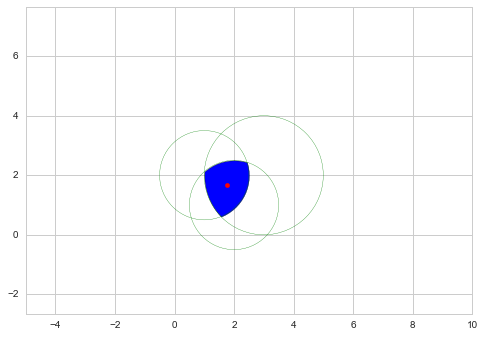

In [3]:
def localiser(c1, c2, c3, mode='2D',solver='CCA', detail=False):
    
    #Define the localisation algorithm to use - here we find the centroid of the intersection
    P=lx.Project(mode=mode,solver=solver,detail=detail)

    #Create objects using the localization package with appropriate paramters
    P.add_anchor('A',c1[0])
    P.add_anchor('B',c2[0])
    P.add_anchor('C',c3[0])
    t,label=P.add_target()
    t.add_measure('A',c1[1])
    t.add_measure('B',c2[1])
    t.add_measure('C',c3[1])
    
    #Find the centroid of intersection of the circles
    tmp=P.solve()
    
    if detail: return tmp,t
    
    return t.loc.x,t.loc.y

def plotCircles(c1, c2, c3, point=None, area=None):
    
    #Plot the circles
    circle1_plot = plt.Circle(c1[0], radius=c1[1],color='g',fill=None)
    circle2_plot = plt.Circle(c2[0], c2[1],color='g',fill=None)
    circle3_plot = plt.Circle(c3[0], c3[1],color='g',fill=None)

    #We'll create each plot as a subplot and then combine them
    fig, ax = plt.subplots() 

    #Make sure the axes have a 1:1 aspect ratio
    #Also set the axis limits (we could calculate these)
    plt.axis('equal')
    plt.xlim(-5,10)
    plt.ylim(-5,10)

    #add each plot to the same axis set
    ax.add_artist(circle1_plot)
    ax.add_artist(circle2_plot)
    ax.add_artist(circle3_plot)

    if area is not None:
        ax.add_collection(PatchCollection([PolygonPatch(area[0], facecolor='blue', alpha=1)], match_original=True))

    #Add a point to show the localised centroid
    #Centroid found using localization function
    if point is not None:
        ax.scatter(point[0],point[1],color='r')

    #Display the plot
    plt.show()

@interact(x1=(0.0,4.0), y1=(1.0,5.0), r1=(1.0,3.0),
            x2=(0.0,4.0), y2=(1.0,5.0), r2=(1.0,3.0),
            x3=(0.0,4.0), y3=(1.0,5.0), r3=(1.0,3.0))
def f(x1=c1[0][0],y1=c1[0][1],r1=c1[1],
    x2=c2[0][0],y2=c2[0][1],r2=c2[1],
    x3=c3[0][0],y3=c3[0][1],r3=c3[1]):
    
    centre=True
    area=True

    c1=((x1,y1),r1)
    c2=((x2,y2),r2)
    c3=((x3,y3),r3)

    x=localiser(c1,c2,c3,detail=True)
    centroid=x[0][2].centroid.x,x[0][2].centroid.y
    centre=None if not centre else centroid
    area=None if not area else (x[0][2],1)

    plotCircles(c1,c2,c3,centre, area)

    centretxt='' if not centre else 'Midpoint: {:.2f} {:.2f}'.format(centre[0],centre[1])
    points.value='''
    Circle 1: centre {}, radius {}
    Circle 2: centre {}, radius {}
    Circle 3: centre {}, radius {}
    {}'''.format((x1,y1),r1,(x2,y2),r2,(x3,y3),r3,centretxt)

In [4]:
points

The installed widget Javascript is the wrong version.
